In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

In [5]:
bikeshare_train = pd.read_csv("Bikeshare_train.csv")
del bikeshare_train["Unnamed: 0"]

In [9]:
bikeshare_test = pd.read_csv("Bikeshare_test.csv")
del bikeshare_test["Unnamed: 0"]

In [11]:
bikeshare_train.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2.561934,6.640483,0.033233,2.854985,0.670695,1.389728,17.018127,19.543807,63.385776,0.190833,4598.447130
std,1.094726,3.353974,0.179515,2.048680,0.470672,0.546962,11.192515,9.930991,14.334789,0.078240,1935.319338
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,25.416700,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.500000,11.000000,52.702900,0.133083,3370.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,18.000000,21.000000,63.291700,0.178479,4648.000000
75%,4.000000,9.500000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.500000,0.235380,5981.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,38.000000,39.000000,97.250000,0.421642,8714.000000


In [12]:
bikeshare_train.dtypes

season         float64
month          float64
holiday        float64
day_of_week    float64
workingday     float64
weather        float64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
count          float64
dtype: object

(array([111.,  45.,  41.,  41.,  93.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <a list of 5 Patch objects>)

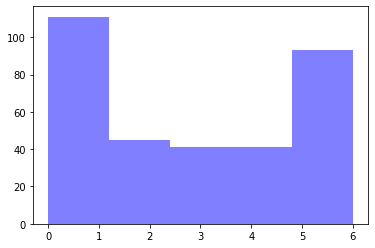

In [13]:
plt.hist(bikeshare_train['day_of_week'], 5, facecolor='blue', alpha=0.5)

In [14]:
bikeshare_train.rename(index=str, columns={"count": "rentals"}, inplace=True) 
bikeshare_test.rename(index=str, columns={"count": "rentals"}, inplace=True)

In [15]:
bikeshare_train.head(5)
pd.set_option('display.max_rows', 500)

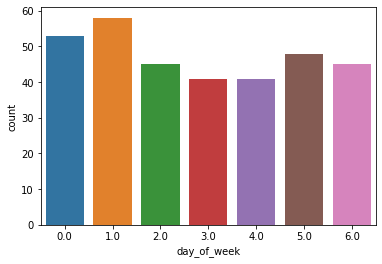

In [16]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='day_of_week',data=bikeshare_train)

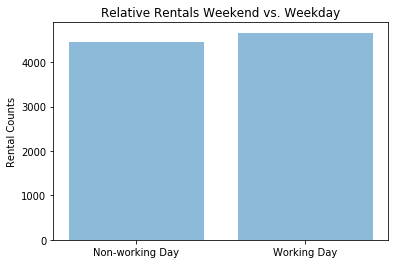

In [18]:
#for getting the average rentals on working day and non-working data

avg = [0, 0]

objects = ('0', '1')

y_pos = np.arange(len(objects))

#check for the non-working day and sum of bike rentals on working day same for working day

day = [bikeshare_train.loc[bikeshare_train['workingday'] == 0, 'rentals'].sum()]

day.append(bikeshare_train.loc[bikeshare_train['workingday'] == 1,'rentals'].sum())


# number_of_entries = list(pd.value_counts(train['workingday'].values, sort=False))
# number_of_entries = list(reversed(number_of_entries))

freq = bikeshare_train['workingday'].value_counts()

# print(number_of_entries)

avg[0] = day[0]/freq[0]

avg[1] = day[1]/freq[1]

plt.bar(y_pos, avg, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Non-working Day', 'Working Day']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals Weekend vs. Weekday') 
plt.show()

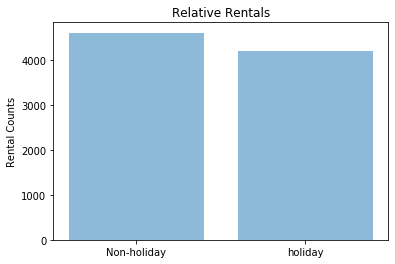

In [19]:
#for getting the average rentals on working day and non-working data

avg1 = [0, 0]

objects = ('0', '1')

y_pos = np.arange(len(objects))

#check for the non-working day and sum of bike rentals on working day same for working day

day1 = [bikeshare_train.loc[bikeshare_train['holiday'] == 0, 'rentals'].sum()]

day1.append(bikeshare_train.loc[bikeshare_train['holiday'] == 1,'rentals'].sum())


# number_of_entries = list(pd.value_counts(train['workingday'].values, sort=False))
# number_of_entries = list(reversed(number_of_entries))

freq1 = bikeshare_train['holiday'].value_counts()

# print(number_of_entries)

avg1[0] = day1[0]/freq1[0]

avg1[1] = day1[1]/freq1[1]

plt.bar(y_pos, avg1, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Non-holiday', 'holiday']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals') 
plt.show()

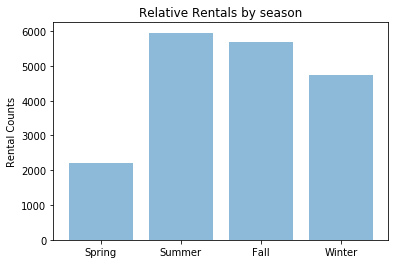

In [20]:
#for getting the average rentals on working day and non-working data

avg2 = [0, 0, 0, 0]

objects = ('1', '2', '3', '4')

y_pos = np.arange(len(objects))

#check for the non-working day and sum of bike rentals on working day same for working day

day2 = [bikeshare_train.loc[bikeshare_train['season'] == 1, 'rentals'].sum()]

day2.append(bikeshare_train.loc[bikeshare_train['season'] == 2,'rentals'].sum())

day2.append(bikeshare_train.loc[bikeshare_train['season'] == 3,'rentals'].sum())

day2.append(bikeshare_train.loc[bikeshare_train['season'] == 4,'rentals'].sum())


# number_of_entries = list(pd.value_counts(train['workingday'].values, sort=False))
# number_of_entries = list(reversed(number_of_entries))

freq2 = bikeshare_train['season'].value_counts()

#print(number_of_entries)


# print(avg2)
# print(day2)
# print(freq2)
# print(freq2.iat[0])
# print(freq2.iat[1])
# print(freq2.iat[2])
# print(freq2.iat[3])
# freq2.iat[1]
avg2[0] = day2[0]/freq2.iat[1]

avg2[1] = day2[1]/freq2.iat[3]
avg2[2] = day2[2]/freq2.iat[0]
avg2[3] = day2[3]/freq2.iat[2]


plt.bar(y_pos, avg2, align='center', alpha=0.5) 
plt.xticks(y_pos, ['Spring', 'Summer', 'Fall', 'Winter']) 
plt.ylabel('Rental Counts') 
plt.title('Relative Rentals by season') 
plt.show()
 

In [22]:
Xtrain, ytrain = bikeshare_train.drop('rentals', axis =1), bikeshare_train['rentals'].values.reshape(-1,1)
Xtest, ytest = bikeshare_test.drop('rentals', axis =1), bikeshare_test['rentals'].values.reshape(-1, 1)


#building a multiple linear regression we have to fit some constant and fit the model
mult_reg = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

ytest_pred = mult_reg.predict(sm.add_constant(Xtest))
ytrain_pred = mult_reg.predict(sm.add_constant(Xtrain))

c:\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
print(mult_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     32.23
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           7.29e-43
Time:                        22:59:55   Log-Likelihood:                -2858.9
No. Observations:                 331   AIC:                             5740.
Df Residuals:                     320   BIC:                             5782.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4352.1686    556.349      7.823      

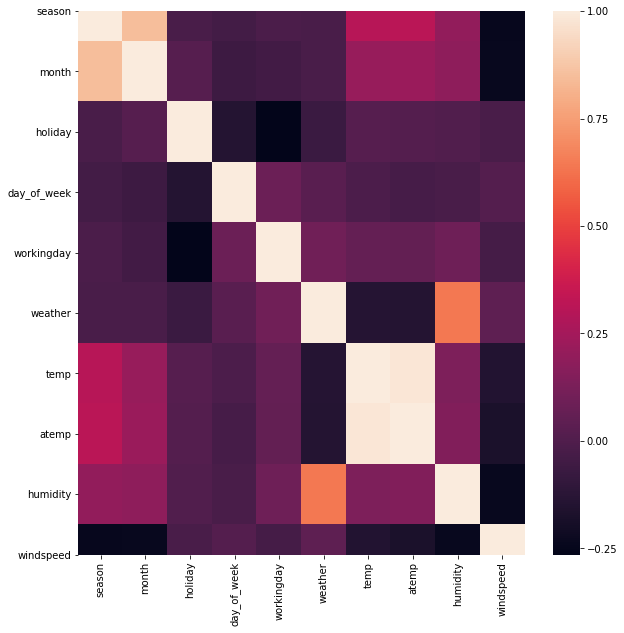

In [24]:
corr = bikeshare_train.drop('rentals', axis = 1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [25]:
p_values = mult_reg.summary2().tables[1]['P>|t|']
p_values= p_values.sort_values()

print(p_values)

const          7.583706e-14
humidity       3.657555e-04
season         7.222613e-04
windspeed      7.391276e-03
day_of_week    2.518451e-02
weather        3.638569e-02
atemp          1.577799e-01
temp           3.547390e-01
workingday     4.448486e-01
holiday        4.707437e-01
month          5.101427e-01
Name: P>|t|, dtype: float64


In [27]:
bikeshare_train.head(5)

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,rentals
0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [28]:
Xtrain, ytrain = bikeshare_train.drop(['rentals','holiday','workingday','temp','month'], axis =1), bikeshare_train['rentals'].values.reshape(-1,1)
Xtest, ytest = bikeshare_test.drop(['rentals','holiday','temp', 'workingday', 'month'], axis =1), bikeshare_test['rentals'].values.reshape(-1, 1)


#building a multiple linear regression we have to fit some constant and fit the model
mult_reg = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

ytest_pred = mult_reg.predict(sm.add_constant(Xtest))
ytrain_pred = mult_reg.predict(sm.add_constant(Xtrain))

In [29]:
print(mult_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     53.42
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           1.37e-45
Time:                        23:03:30   Log-Likelihood:                -2860.4
No. Observations:                 331   AIC:                             5735.
Df Residuals:                     324   BIC:                             5761.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4177.9706    501.185      8.336      